In [23]:
from imageio import imread
import matplotlib.cbook as cbook
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import sys
from sklearn.cluster import KMeans
%matplotlib inline
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score

In [224]:
img1 = plt.imread("data1.jpg") 

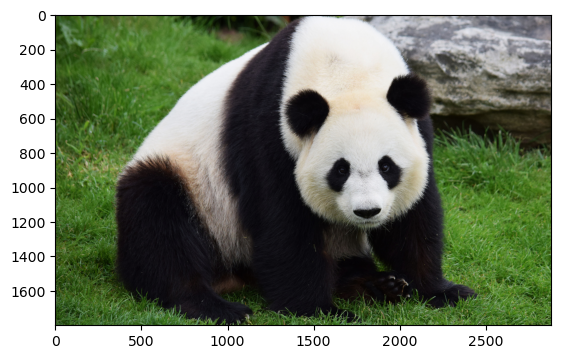

In [225]:
plt.imshow(img1) #the image I have chosen

In [226]:
img1.shape

(1800, 2880, 3)

In [227]:
img2 = img1.reshape((-1, 3)) #we need to prepare the data for clustering, that is, to make of 3 dimensional frame - 2 dimensional


In [228]:
img2.shape

(5184000, 3)

In [229]:
kmeans = KMeans(n_clusters = 4, max_iter = 300).fit(img2) #we use Sklearn Kmeans in order to cluster, i decided to take 4 clusters
kmeans_centroids = kmeans.cluster_centers_.astype(int)

In [235]:
kmeans_centroids.shape

(4, 3)

In [231]:
labels = kmeans.predict(img2)

In [232]:
centers = kmeans_centroids[labels]

In [233]:
img2_final = a.reshape((img1.shape[0], img1.shape[1],3)) #we make 3 dimensional frame in order to be able to get an image

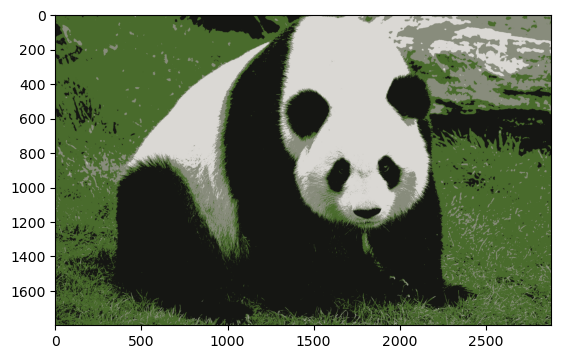

In [234]:
plt.imshow(img2_final) #here is the reduced version of the original image that uses only 4 coulours

Size comparison
If downloaded the original image weighs 308 Kb and the reduced version weighs 168 Kb

How many clusters should I choose? Let's look at artificial data from the file elbow.txt

In [19]:
df = pd.read_csv("elbow.txt", header = None, delimiter = "\t", decimal=',')

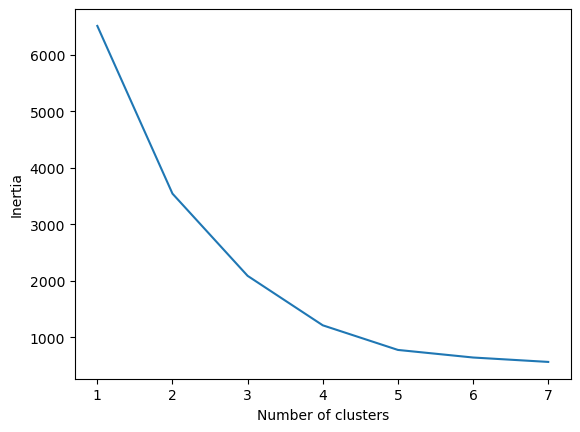

In [21]:
# we calculate inertia for different number of clusters 
inertia = []
for i in range(1,8):
    kmeans = KMeans(n_clusters = i, random_state = 1).fit(df)
    o = kmeans.inertia_
    inertia.append(o)
plt.plot(list(np.arange(1,8)),inertia)
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()
#this graph shows that we the number of clusters = 5, the inertia does not decrease much, that is why by elbow method we can
#suppose that the optimal number of clusters = 5

0.42656003993695446
0.4801766949672749
0.5267750059896404
0.5644441957083284
0.5361898562403977
0.4893343833467073


Text(0, 0.5, 'Silhouette scores')

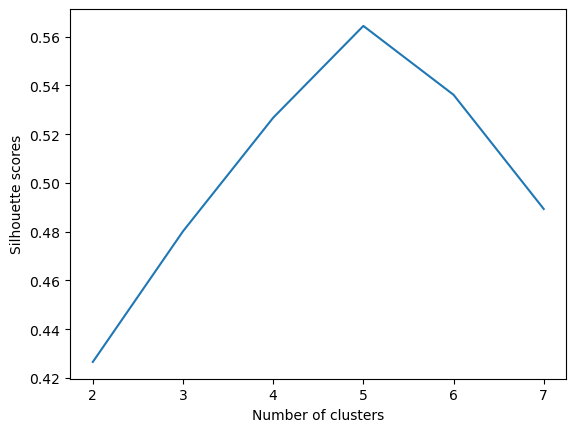

In [24]:
#let us check the above hypothesis using silhouette scores
silhouette = []
for i in range(2,8):
    kmeans = KMeans(n_clusters = i, max_iter = 300)
    y_pred = kmeans.fit_predict(df)
    silhouette_avg = silhouette_score(df, y_pred)
    silhouette.append(silhouette_avg)
    print(silhouette_avg)
n = range(2,8)
plt.plot(n, silhouette)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette scores")
#we see that for the number of clusters = 5, the silhouette score is the highest, our hypothesis is confirmed